# Analisis de departamentos en venta en CABA

Determinaremos a partir del dataset obtenido en properati cual seria el precio segun cada barrio en CABA a partir de distintas variables.

### Librerias

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Importacion y analisis preliminar

In [54]:
# importamos el dataset descargado, como pesa 1 GB lo tengo localmente
data=pd.read_csv(r'C:\Users\Ariel\Documents\Ariel\Datos para trabajo final\ar_properties.csv')
data.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
3,Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,...,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
4,bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,...,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta


In [55]:
#vemos los nombres de las columnas
data.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

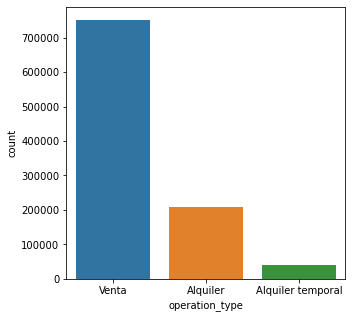

In [56]:
# vemos los tipos de operacion que se realizaron
plt.figure(figsize=(5,5))
           
sns.countplot(data=data,x='operation_type')
           
plt.show()

In [57]:
#nos quedamos solamente con los valores de venta
data=data.loc[data['operation_type']=='Venta', :].reset_index(drop=True)
data['operation_type'].unique()

array(['Venta'], dtype=object)

In [58]:
#vemos los valores de los distintos paises
data['l1'].unique()

array(['Argentina', 'Uruguay', 'Estados Unidos', 'Brasil'], dtype=object)

In [59]:
# nos quedamos solamente con Argentina

data=data.loc[data['l1']=='Argentina' , :]
data['l1'].unique()

array(['Argentina'], dtype=object)

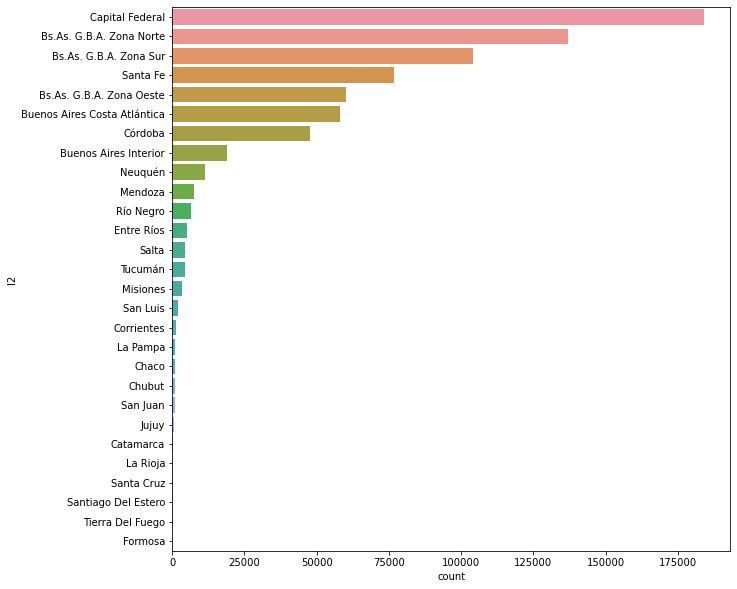

In [60]:
# vemos los valores de las distintas provincias
plt.figure(figsize=(10,10))
           
sns.countplot(data=data,
              y='l2',
             order=data['l2'].value_counts().index)
           
plt.show()

In [61]:
# nos quedamos solamente con los valores de Capital Federal
data=data.loc[data['l2']=='Capital Federal',:]
data['l2'].unique()

array(['Capital Federal'], dtype=object)

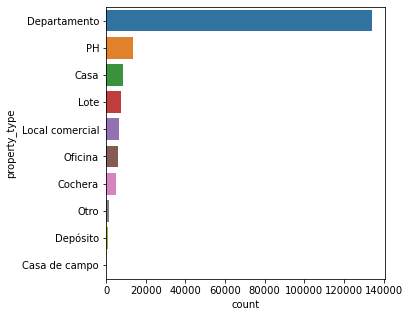

In [62]:
# vemos los distintos tipos de propiedades
plt.figure(figsize=(5,5))
           
sns.countplot(data=data,
              y='property_type',
             order=data['property_type'].value_counts().index)
           
plt.show()

In [63]:
# nos quedamos solamente con los dapartamentos para unificar el analisis y tener mayor cantidad de datos

data=data.loc[ data['property_type']=='Departamento' , :]
data['property_type'].unique()

array(['Departamento'], dtype=object)

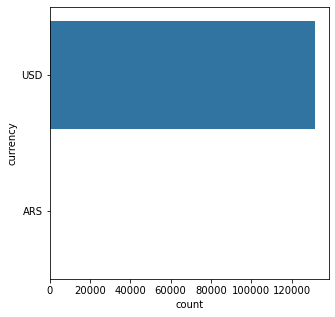

In [64]:
#vemos la moneda con la cual se realizo el pago

plt.figure(figsize=(5,5))
           
sns.countplot(data=data,
              y='currency',
             order=data['currency'].value_counts().index)
           
plt.show()

In [65]:
#nos quedamos solamnete con los valores de USD

data=data.loc[data['currency']=='USD', : ]
data['currency'].unique()

array(['USD'], dtype=object)

In [66]:
#vemos la cantidad de barrios que estan en el dataset

len(data['l3'].unique())

# hay 10 barrios más del total de barrios de capital
# vamos a analizar la estructura del dataset y volvemos con este caso

58

### Analisis de la estructura del dataset

In [67]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131720 entries, 74 to 750816
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               131720 non-null  object 
 1   ad_type          131720 non-null  object 
 2   start_date       131720 non-null  object 
 3   end_date         131720 non-null  object 
 4   created_on       131720 non-null  object 
 5   lat              123428 non-null  float64
 6   lon              123428 non-null  float64
 7   l1               131720 non-null  object 
 8   l2               131720 non-null  object 
 9   l3               131209 non-null  object 
 10  l4               5914 non-null    object 
 11  l5               0 non-null       object 
 12  l6               0 non-null       float64
 13  rooms            125620 non-null  float64
 14  bedrooms         108655 non-null  float64
 15  bathrooms        125765 non-null  float64
 16  surface_total    89751 non-null   flo

In [68]:
# vamos a empezar a ver que columnas podemos eliminar

for i in data.columns:
    print('*************')
    print(i)
    print(data[i].value_counts())
    print('----------------')

*************
id
U3qdJMKXnOJm0Y1tWpnnfg==    1
fWPPCdNlkjl64J6Q3hIKcA==    1
GZG4OybSfzV7tqQtwvOWkQ==    1
QDqixBydViDZzk4JAvENLg==    1
zGWJpX0BTwme00jJMTNTgw==    1
                           ..
TfrRsjdZOrNAxRI2CY2eXw==    1
CVQeYYpxJDUUspKpO5LWSg==    1
ZHf9cozLT5bL+qimUvWM7A==    1
RRKGc7QyiWU4PinhvXlVcw==    1
No3is+HhwUGlfgQfzsZbdg==    1
Name: id, Length: 131720, dtype: int64
----------------
*************
ad_type
Propiedad    131720
Name: ad_type, dtype: int64
----------------
*************
start_date
2020-10-02    2485
2020-12-03    2278
2020-11-04    1666
2020-06-27    1544
2020-07-22    1485
              ... 
2020-12-07      38
2021-05-09      37
2020-12-26      34
2021-01-02      33
2020-12-25      29
Name: start_date, Length: 361, dtype: int64
----------------
*************
end_date
9999-12-31    23222
2021-06-05    10856
2021-04-09     2656
2021-06-08     2463
2020-09-04     2160
              ...  
2020-06-14        5
2020-05-31        4
2020-06-21        2
2020-05-27  

In [69]:
data.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [70]:
# elegimos las columnas con las que nos vamos a quedar

data_limpia=data[['created_on','lat', 'lon','l3','rooms',
                  'bedrooms', 'bathrooms',
                  'surface_total', 'surface_covered', 'price',
                  'title', 'description',]]

In [71]:
#vemos los valores nulos y nos quedamos solamente con los valores que no lo son
data_limpia=data_limpia.loc[~data_limpia['surface_total'].isnull(), :].reset_index(drop=True)
data_limpia

,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description
0,2020-08-22,-34.600004,-58.417191,Almagro,1.0,NaN,1.0,38.0,31.0,110000.0,Monoambiente c/Cochera Fija Cubierta. Edif c/P...,Monoambiente de 38m² en muy buen estado con Am...
1,2020-08-22,-34.581699,-58.433547,Palermo,1.0,NaN,1.0,35.0,30.0,105000.0,Oportunidad!!!!Palermo Hollywood Monoamb amobl...,RETASADO Venta Palermo Niceto Vega y Bonpland ...
2,2020-08-22,-34.595044,-58.442538,Palermo,2.0,NaN,1.0,51.0,46.0,150000.0,2 AMBIENTES CON COCHERA Y PARRILLA EN VILLA CR...,CONTACTO: 11- (LLAMADOS O WHATSAPP)<br><br>EXC...
3,2020-08-22,-34.582549,-58.417350,Palermo,2.0,NaN,1.0,53.0,53.0,136500.0,2 AMB EN PALERMO,2 AMBIENTES CON 2 BALCÓNES PISO 8<br><br>Inmej...
4,2020-08-22,-34.578497,-58.424945,Palermo,1.0,NaN,1.0,30.0,30.0,139000.0,Oportunidad Excelente Mono Amueblado en Palerm...,Espectacular Departamento tipo estudio en TORR...
...,...,...,...,...,...,...,...,...,...,...,...,...
89746,2020-12-04,-34.591479,-58.383174,Recoleta,8.0,4.0,4.0,387.0,357.0,1500000.0,Excelente Piso en Avda. Alvear y Libertad Plaz...,Excelente Piso de gran categoría en una de las...
89747,2020-12-04,-34.585810,-58.405548,Barrio Norte,5.0,4.0,2.0,247.0,NaN,770000.0,VENTA DEPARTAMENTO DUPLEX - TOTALMENTE REFACCI...,DEPARTAMENTO IMPECABLE!!! - TOTALMENTE REFACCI...
89748,2020-12-04,-34.600052,-58.393015,Barrio Norte,5.0,4.0,1.0,110.0,95.0,318000.0,Departamento - P.Las Heras,Excelente . 3 dormitorios con placards + depen...
89749,2020-12-04,-34.573074,-58.419353,Palermo,8.0,5.0,3.0,419.0,375.0,1350000.0,Impactante vista a los parques. 420 m2 con coc...,Piso de 419 m2 en un emblemático edificio mode...


In [72]:
# vemos la cantidad de propiedades que faltan vender
pd.DataFrame([i.split('-')[0] for i in data['end_date']])[0].value_counts()

2021    62403
2020    46095
9999    23222
Name: 0, dtype: int64

In [73]:
pd.to_datetime(data_limpia['created_on']).dt.year.value_counts()

2020    58724
2021    31027
Name: created_on, dtype: int64

### Analisis de valores nulos

In [74]:
#acomodamos el nombre de las columnas

data_limpia.columns=['creacion_registro','lat', 'lon', 'neighborhood', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'title', 'description']

In [75]:
#vemos nuevamente la estructura del dataset

data_limpia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89751 entries, 0 to 89750
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creacion_registro  89751 non-null  object 
 1   lat                83933 non-null  float64
 2   lon                83933 non-null  float64
 3   neighborhood       89371 non-null  object 
 4   rooms              87384 non-null  float64
 5   bedrooms           72953 non-null  float64
 6   bathrooms          88300 non-null  float64
 7   surface_total      89751 non-null  float64
 8   surface_covered    87242 non-null  float64
 9   price              89751 non-null  float64
 10  title              89751 non-null  object 
 11  description        89751 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.2+ MB


In [76]:
# eliminamos los valores nulos de latitud y longitud

data_limpia=data_limpia.loc[(~data_limpia['lat'].isnull()) | (~data_limpia['lon'].isnull()) , :]

In [77]:
#eliinamos los valores nulos de barrios
data_limpia=data_limpia.loc[(~data_limpia['neighborhood'].isnull()) , :]

In [78]:
# para los bedrooms por lo menos debe tener 1, en caso de ser un monoambiente, idem para la situacion de los baños
data_limpia.loc[(data_limpia['rooms'].isnull()) , 'rooms']=1
data_limpia.loc[(data_limpia['bedrooms'].isnull()) , 'bedrooms']=1
data_limpia.loc[(data_limpia['bathrooms'].isnull()) , 'bathrooms']=1

In [79]:
#vamos a analizar los valores de la superficie

(data_limpia['surface_covered']>data_limpia['surface_total']).sum()

# podemos ver que hay 259 valores donde la superficie es mayor a la superficie total, vamos a acomodarlos



423

In [80]:
#acomodamos los valores de superficie para aquellos casos que la superfice cubierta es mayor que la total

data_limpia['surface_covered']=np.where((data_limpia['surface_covered']>data_limpia['surface_total']),
                                        data_limpia['surface_total'],
                                        data_limpia['surface_covered'])



In [81]:
# vamos a acomodar los valores nulos de superfices cubiertas, sera igual que los valores totales
data_limpia['surface_covered']=np.where(data_limpia['surface_covered'].isnull(),
        data_limpia['surface_total'],
        data_limpia['surface_covered'])

In [82]:
# vemos como quedo compuesta la estructura del datafraem
data_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83777 entries, 0 to 89750
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creacion_registro  83777 non-null  object 
 1   lat                83777 non-null  float64
 2   lon                83777 non-null  float64
 3   neighborhood       83777 non-null  object 
 4   rooms              83777 non-null  float64
 5   bedrooms           83777 non-null  float64
 6   bathrooms          83777 non-null  float64
 7   surface_total      83777 non-null  float64
 8   surface_covered    83777 non-null  float64
 9   price              83777 non-null  float64
 10  title              83777 non-null  object 
 11  description        83777 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.3+ MB


### Analisis de los barrios 

In [83]:
# vamos a volver a ver los valores de barrios 

len(data_limpia['neighborhood'].unique())

#vemos que hay 57 valores cuando deberian ser 48

57

In [84]:
# vemos los barrios del dataset
data_limpia['neighborhood']=data_limpia['neighborhood'].str.upper()
barrios_dataset= data_limpia['neighborhood'].unique()

barrios_dataset

array(['ALMAGRO', 'PALERMO', 'SAAVEDRA', 'CHACARITA', 'BARRIO NORTE',
       'SAN NICOLÁS', 'VILLA CRESPO', 'VILLA PUEYRREDÓN', 'ONCE',
       'COGHLAN', 'BELGRANO', 'VILLA DEVOTO', 'VILLA URQUIZA', 'BOEDO',
       'FLORES', 'NUÑEZ', 'BARRACAS', 'RECOLETA', 'COLEGIALES',
       'VILLA DEL PARQUE', 'CABALLITO', 'RETIRO', 'FLORESTA', 'BALVANERA',
       'MONTE CASTRO', 'VILLA GENERAL MITRE', 'PARQUE CHACABUCO',
       'ABASTO', 'PUERTO MADERO', 'SAN CRISTOBAL', 'VILLA SANTA RITA',
       'VILLA LUGANO', 'CONGRESO', 'MONSERRAT', 'BOCA', 'SAN TELMO',
       'PARQUE CENTENARIO', 'LINIERS', 'LAS CAÑITAS', 'TRIBUNALES',
       'PARQUE PATRICIOS', 'PATERNAL', 'CENTRO / MICROCENTRO',
       'CONSTITUCIÓN', 'POMPEYA', 'VILLA LURO', 'VERSALLES', 'AGRONOMÍA',
       'VILLA REAL', 'MATADEROS', 'VILLA SOLDATI', 'VILLA ORTUZAR',
       'PARQUE AVELLANEDA', 'VELEZ SARSFIELD', 'PARQUE CHAS',
       'VILLA RIACHUELO', 'CATALINAS'], dtype=object)

In [85]:
# listado oficial de barrios de caba
barrios_caba= ['AGRONOMÍA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO',
       'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES',
       'CONSTITUCIÓN', 'FLORES', 'FLORESTA', 'LINIERS', 'MATADEROS',
       'MONSERRAT', 'MONTE CASTRO', 'NUEVA POMPEYA', 'NUÑEZ', 'PALERMO',
       'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS',
       'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA',
       'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLÁS', 'SAN TELMO',
       'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE',
       'VILLA DEVOTO', 'VILLA GENERAL MITRE', 'VILLA LUGANO', 'VILLA LURO',
       'VILLA ORTUZAR', 'VILLA PUEYRREDÓN', 'VILLA REAL',
       'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI',
       'VILLA URQUIZA']

In [86]:
# a traves de una lista de comprension repasamos cuales son los barrios que no estan en la lista
barrios_no_oficiales=[i for i in barrios_dataset if i not in barrios_caba]
len(barrios_no_oficiales)

10

In [87]:
len(data_limpia['neighborhood'].unique())

57

In [88]:
data_limpia['neighborhood'].unique()

array(['ALMAGRO', 'PALERMO', 'SAAVEDRA', 'CHACARITA', 'BARRIO NORTE',
       'SAN NICOLÁS', 'VILLA CRESPO', 'VILLA PUEYRREDÓN', 'ONCE',
       'COGHLAN', 'BELGRANO', 'VILLA DEVOTO', 'VILLA URQUIZA', 'BOEDO',
       'FLORES', 'NUÑEZ', 'BARRACAS', 'RECOLETA', 'COLEGIALES',
       'VILLA DEL PARQUE', 'CABALLITO', 'RETIRO', 'FLORESTA', 'BALVANERA',
       'MONTE CASTRO', 'VILLA GENERAL MITRE', 'PARQUE CHACABUCO',
       'ABASTO', 'PUERTO MADERO', 'SAN CRISTOBAL', 'VILLA SANTA RITA',
       'VILLA LUGANO', 'CONGRESO', 'MONSERRAT', 'BOCA', 'SAN TELMO',
       'PARQUE CENTENARIO', 'LINIERS', 'LAS CAÑITAS', 'TRIBUNALES',
       'PARQUE PATRICIOS', 'PATERNAL', 'CENTRO / MICROCENTRO',
       'CONSTITUCIÓN', 'POMPEYA', 'VILLA LURO', 'VERSALLES', 'AGRONOMÍA',
       'VILLA REAL', 'MATADEROS', 'VILLA SOLDATI', 'VILLA ORTUZAR',
       'PARQUE AVELLANEDA', 'VELEZ SARSFIELD', 'PARQUE CHAS',
       'VILLA RIACHUELO', 'CATALINAS'], dtype=object)

In [89]:
# vemos que hay 3866 departamentos que tienen mal escrito el barrio, por el momento vamos a hacer un drop de los mismos
data_limpia=data_limpia.loc[~data_limpia['neighborhood'].isin(barrios_no_oficiales) , : ]

data_limpia.reset_index(drop=True,inplace=True)
data_limpia.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78769 entries, 0 to 78768
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creacion_registro  78769 non-null  object 
 1   lat                78769 non-null  float64
 2   lon                78769 non-null  float64
 3   neighborhood       78769 non-null  object 
 4   rooms              78769 non-null  float64
 5   bedrooms           78769 non-null  float64
 6   bathrooms          78769 non-null  float64
 7   surface_total      78769 non-null  float64
 8   surface_covered    78769 non-null  float64
 9   price              78769 non-null  float64
 10  title              78769 non-null  object 
 11  description        78769 non-null  object 
dtypes: float64(8), object(4)
memory usage: 130.0 MB


In [91]:
# guardamos el dataframe limpio para su posterior trabajo en los modelos
# data_limpia.to_csv('dataframe_departamentos_caba.csv')